In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cmocean.cm as cmocean
import os
import xarray as xr
import numpy as np
import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
import pylab
import cosima_cookbook as cc
from dask.distributed import Client
client = Client(n_workers=28)
client

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)
logging.getLogger('distributed.utils_perf').setLevel(logging.ERROR)

In [6]:
WOA_sal=xr.open_dataset('/g/data/ik11/inputs/mom6/panan/01deg/20230404/salt_restore.nc',decode_times=False)
Pauthenet_sal=xr.open_dataset('/g/data/ik11/observations/Southern_Ocean_Climatology_PauthenetETAL2021/TS_Climato_Antarctic60S.nc').isel(depth=0)
ACCESS_sal=xr.open_dataset('/home/156/wf4500/access-om2-01/ryf/localinput/salt_sfc_restore.nc',decode_times=False)

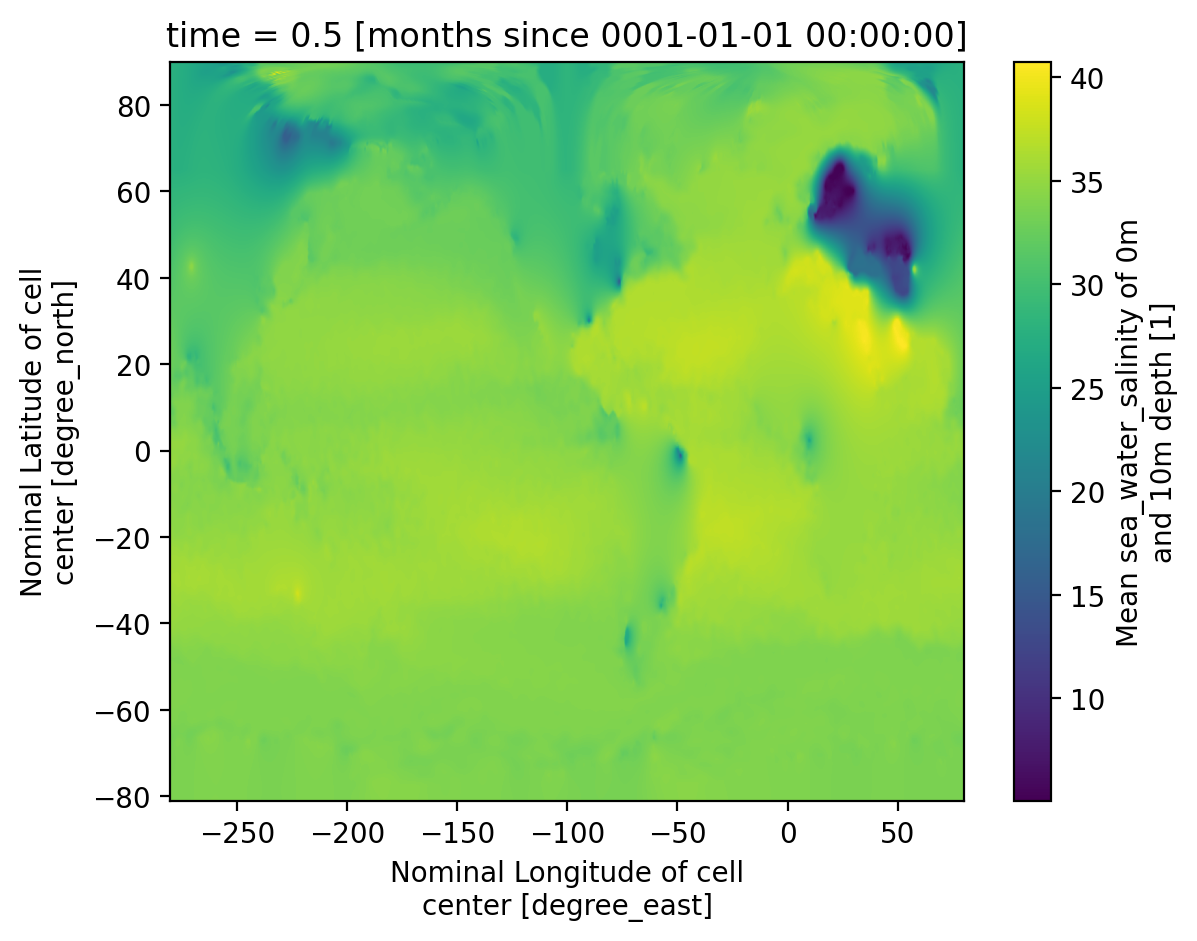

In [16]:
#testing salinity
Pauthenet_salvar=Pauthenet_sal['Sal']
ACCESS_sal['salt'].isel(time=0).plot()

In [43]:
# # target grid (t points)

# # - WOA
# dg = xr.open_dataset('/g/data/ik11/inputs/mom6/panan/01deg/20230404/salt_restore.nc',decode_times=False)
# #latout=dg.variables['lat'].isel(nxp=slice(0, 1, 1),nyp=slice(-1, None, -1400)).values


# dg = (
#     dg[["lon", "lat"]]
# )
# # source grid (t points)
# # - Pauthenet
# dg01 = xr.open_dataset('/g/data/ik11/observations/Southern_Ocean_Climatology_PauthenetETAL2021/TS_Climato_Antarctic60S.nc').isel(depth=0)
# #latin=dg01.variables['y'].isel(nxp=slice(0, 1, 1),nyp=slice(-1, None, -600)).values
# dg01 = (
#     dg01[["lon", "lat"]]
# )
# dg


<xarray.Dataset>
Dimensions:  (lon: 3600, lat: 845)
Coordinates:
  * lon      (lon) float64 -279.9 -279.8 -279.7 -279.6 ... 79.75 79.85 79.95
  * lat      (lat) float64 -81.11 -81.07 -81.02 -80.98 ... -37.3 -37.22 -37.14
Data variables:
    *empty*
Attributes:
    comment:  This salinity distribution is based on WOA13v2 where the land v...
    history:  Mon Apr 24 13:45:56 2023: ncks -d lat,,844 salt_restore.nc salt...
    NCO:      netCDF Operators version 5.1.3 (Homepage = http://nco.sf.net, C...

In [44]:
# %%time
# import xesmf as xe
# regridder = xe.Regridder(
#     dg01,
#     dg,
#     "bilinear",
#     periodic=True,
# )


CPU times: user 14min 58s, sys: 1min 16s, total: 16min 14s
Wall time: 13min 2s


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_37x720_845x3600_peri.nc 
Reuse pre-computed weights? False 
Input grid shape:           (37, 720) 
Output grid shape:          (845, 3600) 
Periodic in longitude?      True

In [45]:
# regridder

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_37x720_845x3600_peri.nc 
Reuse pre-computed weights? False 
Input grid shape:           (37, 720) 
Output grid shape:          (845, 3600) 
Periodic in longitude?      True

In [52]:
# for t in range(0,12):
#             dd = Pauthenet_salvar.isel(time=t)
#             dd_out = regridder(dd)
#             #B=dd_out.expand_dims(dim={"z_t": 1,"time":1})
#             if t>0:
#                 dd_out2=xr.concat([dd_out2,dd_out], dim="time") 
#             else :
#                 dd_out2=dd_out
#             del dd 


In [85]:
# Reg_Pauthenet_salvar = dd_out2.sel(lat=slice(-90,-60.40000153))

In [31]:
#Saving Pauthenet
#Reg_Pauthenet_salvar.to_netcdf("/g/data/v45/wf4500/Reg_Pauthenet_Sal.nc")
Reg_Pauthenet_salvar=xr.open_dataset("/g/data/v45/wf4500/Reg_Pauthenet_Sal.nc")
Reg_Pauthenet_salvar = Reg_Pauthenet_salvar.rename(__xarray_dataarray_variable__='Sal')

In [32]:
#Seasonal Averages

In [93]:
Summer_Pauthenet_salvar= Reg_Pauthenet_salvar.isel(time=[11,0,1]).mean(dim='time')
Autumn_Pauthenet_salvar= Reg_Pauthenet_salvar.isel(time=[2,3,4]).mean(dim='time')
Winter_Pauthenet_salvar= Reg_Pauthenet_salvar.isel(time=[5,6,7]).mean(dim='time')
Spring_Pauthenet_salvar= Reg_Pauthenet_salvar.isel(time=[8,9,10]).mean(dim='time')


Summer_WOA_sal= WOA_sal.isel(time=[11,0,1]).mean(dim='time')
Autumn_WOA_sal= WOA_sal.isel(time=[2,3,4]).mean(dim='time')
Winter_WOA_sal= WOA_sal.isel(time=[5,6,7]).mean(dim='time')
Spring_WOA_sal= WOA_sal.isel(time=[8,9,10]).mean(dim='time')



Summer_ACCESS_sal= ACCESS_sal.isel(time=[11,0,1]).mean(dim='time').isel(lat=slice(0,482))
Autumn_ACCESS_sal= ACCESS_sal.isel(time=[2,3,4]).mean(dim='time').isel(lat=slice(0,482))
Winter_ACCESS_sal= ACCESS_sal.isel(time=[5,6,7]).mean(dim='time').isel(lat=slice(0,482))
Spring_ACCESS_sal= ACCESS_sal.isel(time=[8,9,10]).mean(dim='time').isel(lat=slice(0,482))

In [95]:
#masking
mask_sal = Winter_Pauthenet_salvar.where(np.isnan(Winter_Pauthenet_salvar),1)
Winter_ACCESS_sal = Winter_ACCESS_sal*mask_sal.Sal
Summer_ACCESS_sal = Summer_ACCESS_sal*mask_sal.Sal
Autumn_ACCESS_sal = Autumn_ACCESS_sal*mask_sal.Sal
Spring_ACCESS_sal = Spring_ACCESS_sal*mask_sal.Sal

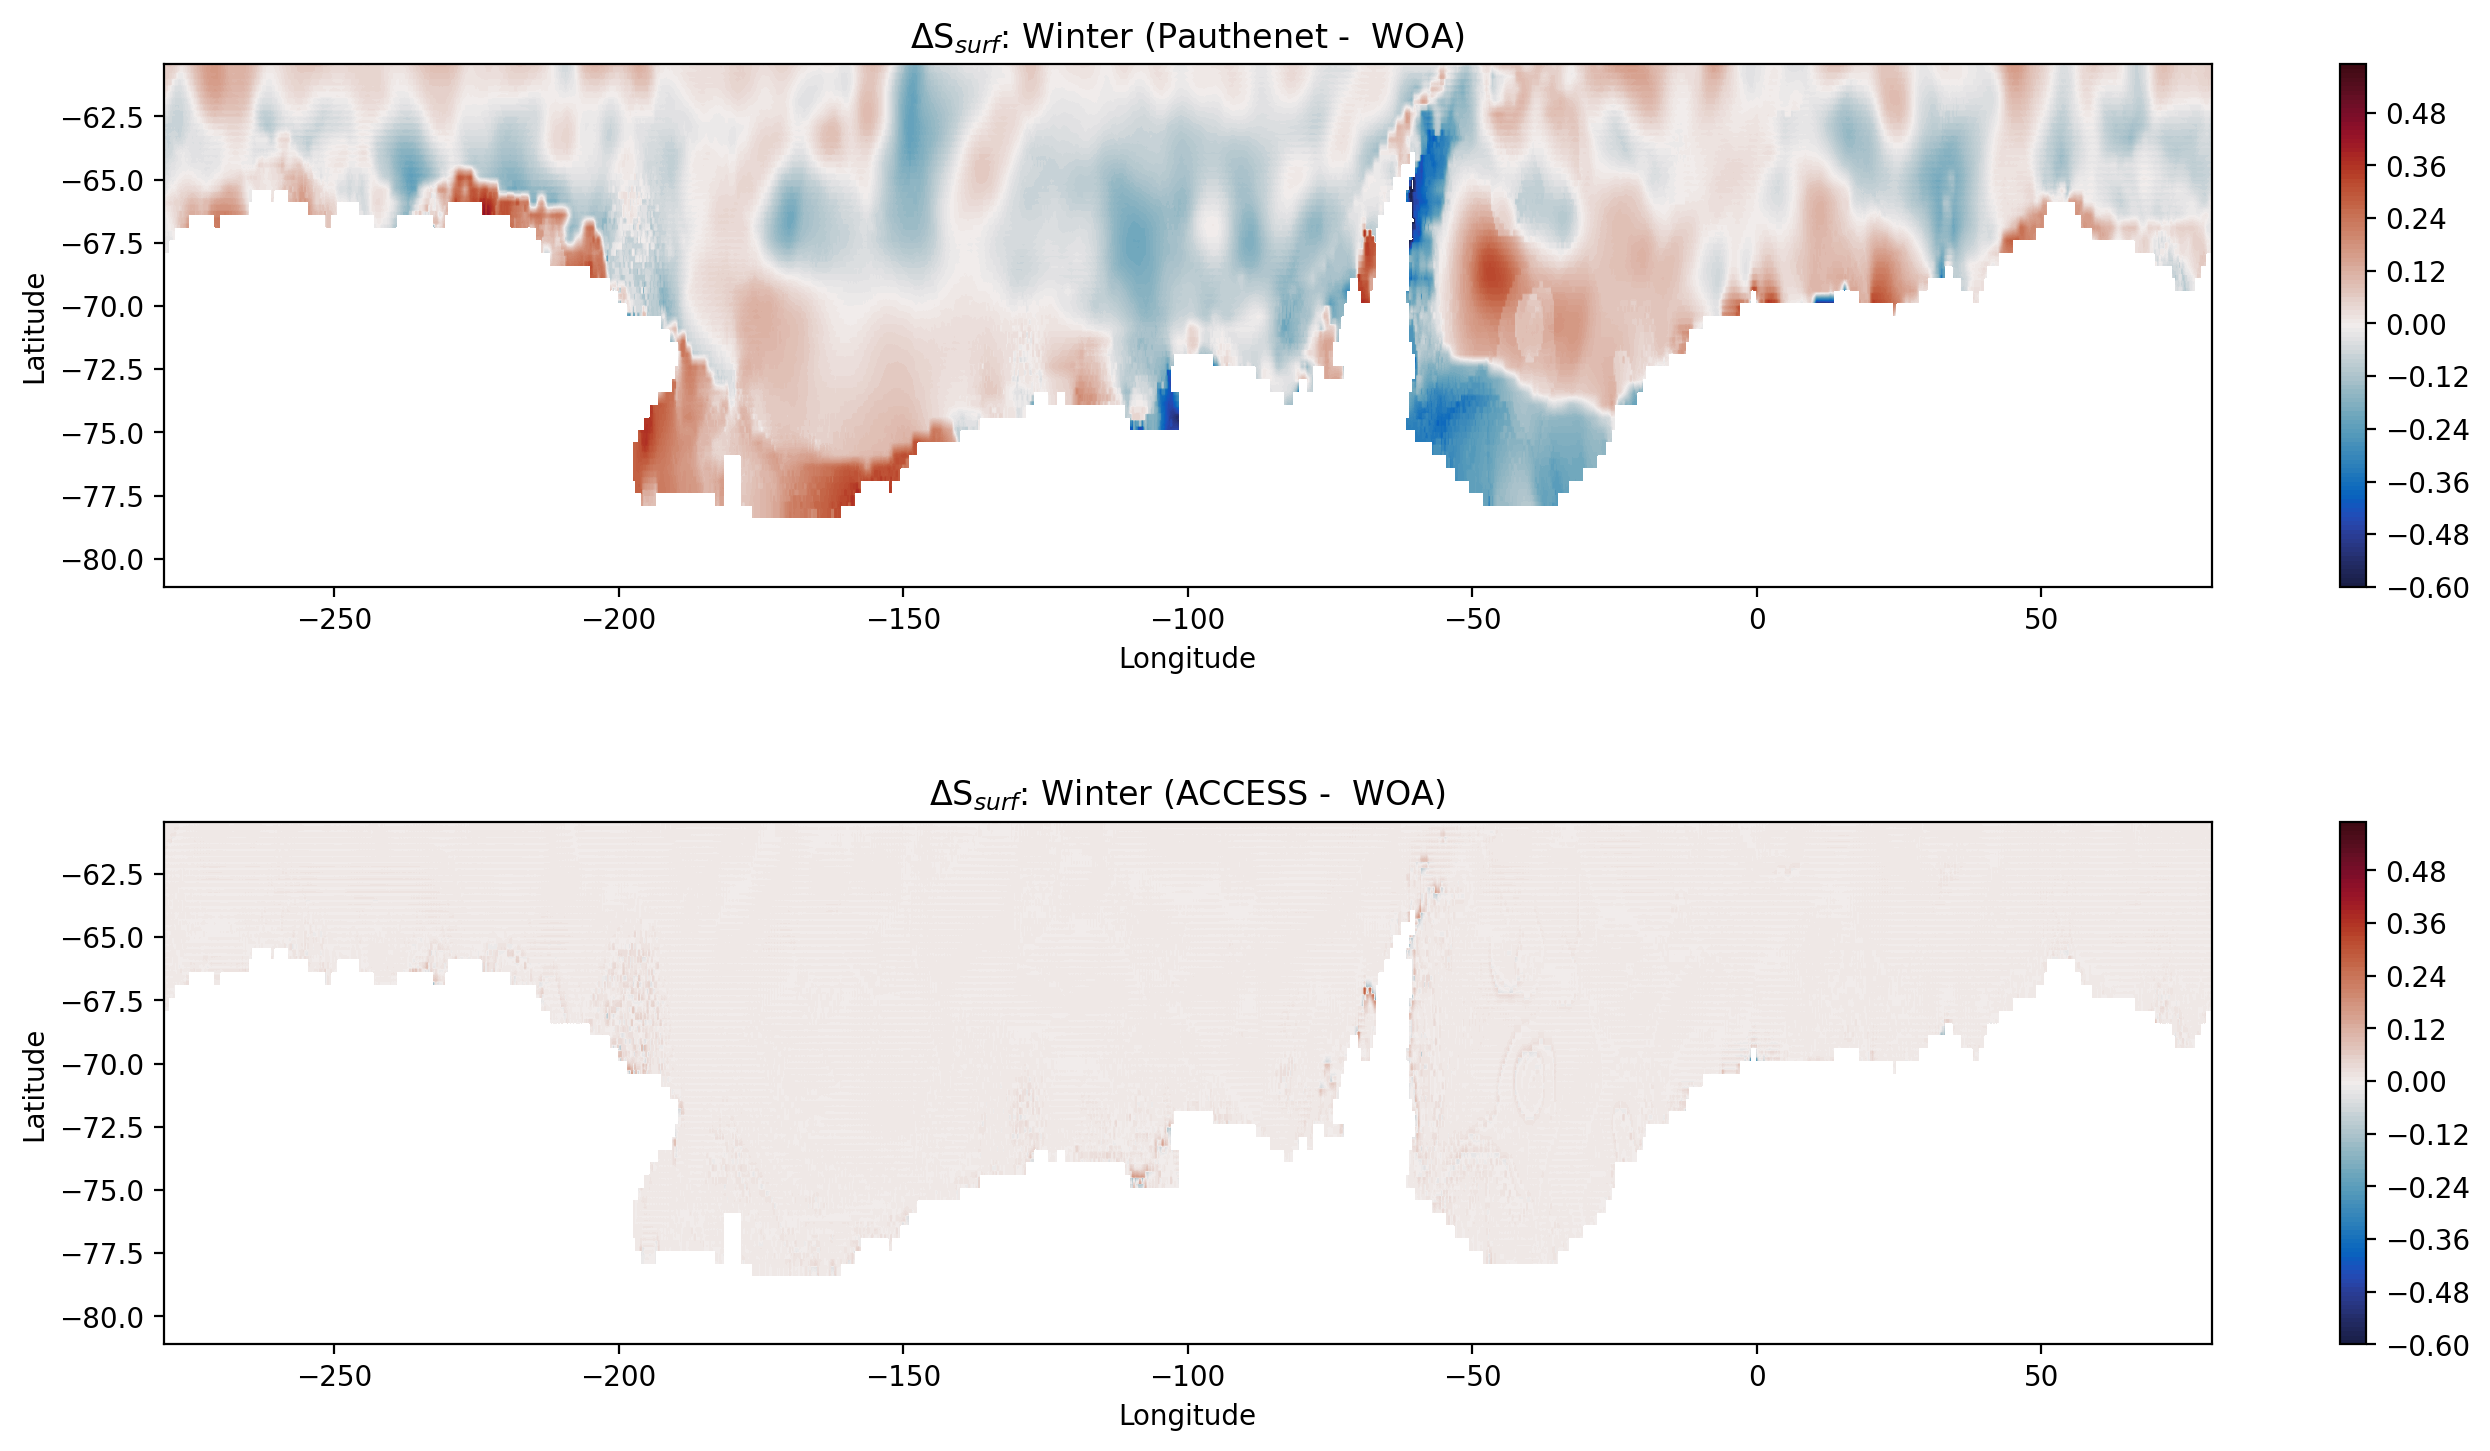

In [98]:
#Plot Winter comparisson between two datasets
fig = plt.figure(figsize=(16,8))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.15,
                    hspace=0.45)

plt.subplot(211)
plt.contourf(Winter_Pauthenet_salvar['lon'],Winter_Pauthenet_salvar['lat'],
             -(np.array(Winter_WOA_sal['salt'].isel(lat=slice(0,482))) - np.array(Winter_Pauthenet_salvar['Sal'])),
             np.arange(-0.6,0.6,0.01),
             cmap=cmocean.balance)
plt.title(r"$\Delta$S$_{surf}$: Winter (Pauthenet -  WOA)")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()


plt.subplot(212)
plt.contourf(Winter_Pauthenet_salvar['lon'],Winter_Pauthenet_salvar['lat'],
             -(np.array(Winter_WOA_sal['salt'].isel(lat=slice(0,482))) - np.array(Winter_ACCESS_sal['salt'])),
             np.arange(-0.6,0.6,0.01),
             cmap=cmocean.balance)
plt.title(r"$\Delta$S$_{surf}$: Winter (ACCESS -  WOA)")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()

plt.savefig('/g/data/v45/wf4500/SALT_RESTORE_Winter_CHECK.png')

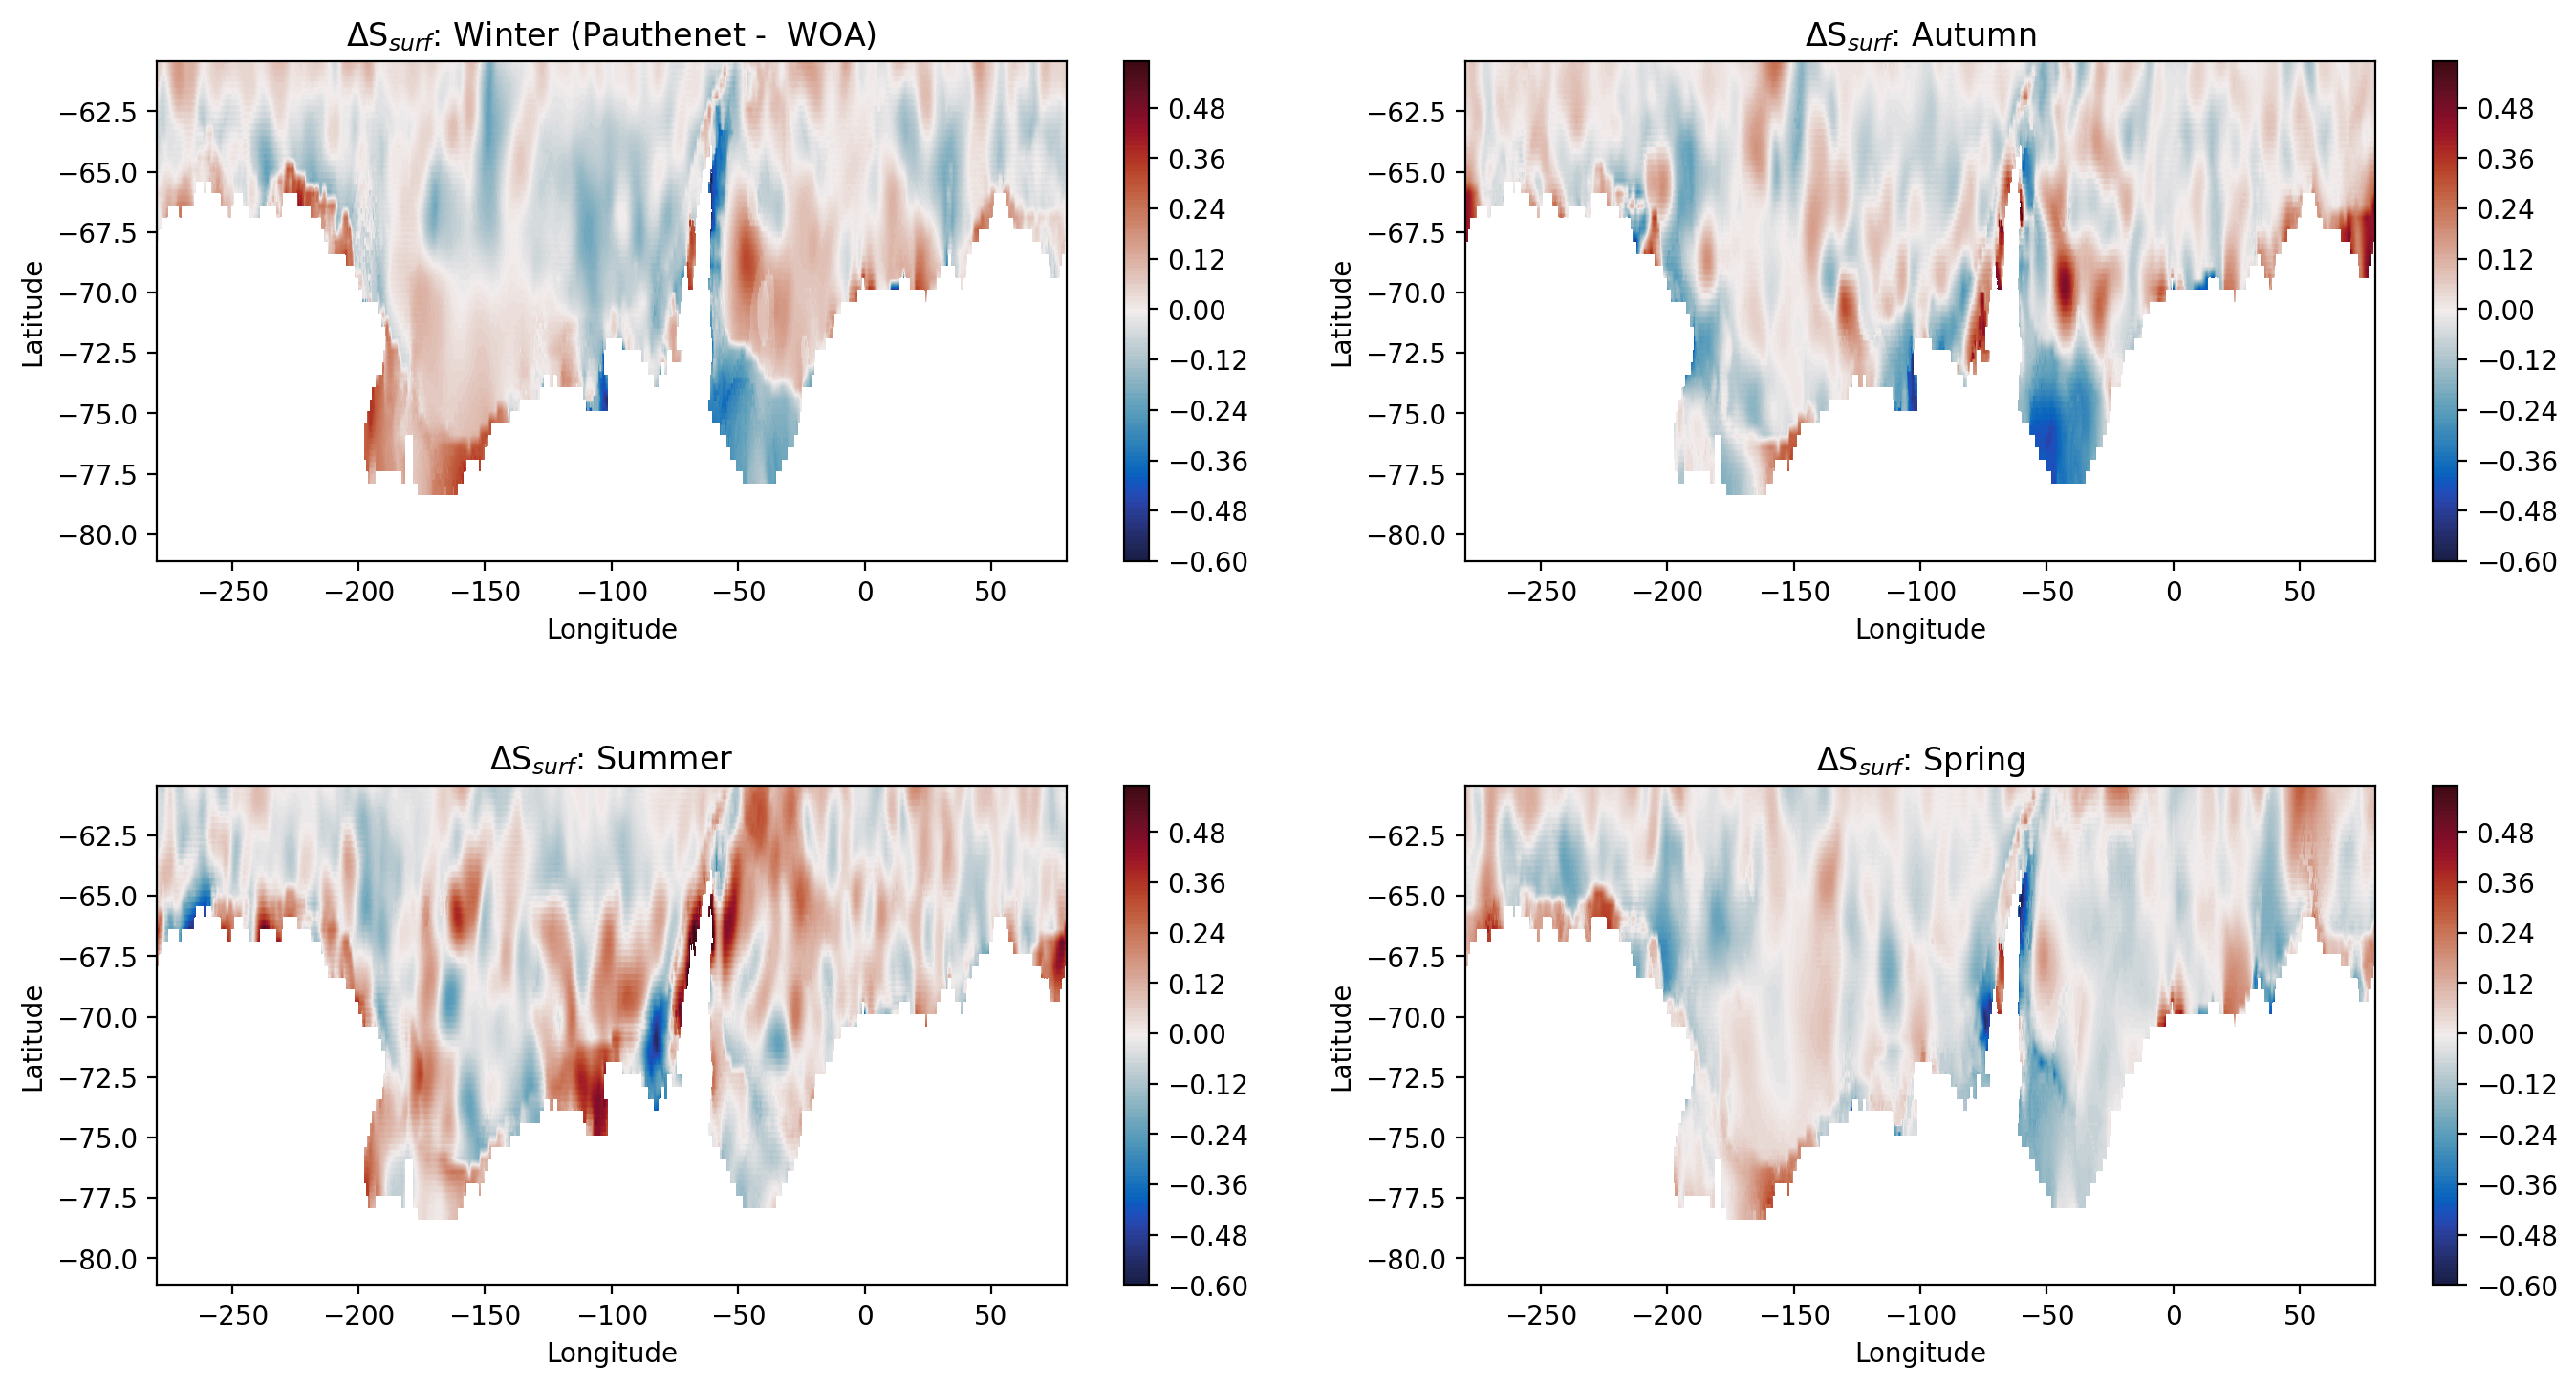

In [99]:
#Plot Seasonally 
fig = plt.figure(figsize=(16,8))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.15,
                    hspace=0.45)

plt.subplot(221)
plt.contourf(Winter_Pauthenet_salvar['lon'],Winter_Pauthenet_salvar['lat'],
             -(np.array(Winter_WOA_sal['salt'].isel(lat=slice(0,482))) - np.array(Winter_Pauthenet_salvar['Sal'])),
             np.arange(-0.6,0.6,0.01),
             cmap=cmocean.balance)
plt.title(r"$\Delta$S$_{surf}$: Winter (Pauthenet -  WOA)")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()

plt.subplot(222)
plt.contourf(Autumn_Pauthenet_salvar['lon'],Autumn_Pauthenet_salvar['lat'],
             -(np.array(Autumn_WOA_sal['salt'].isel(lat=slice(0,482))) - np.array(Autumn_Pauthenet_salvar['Sal'])),
             np.arange(-0.6,0.6,0.01),
             cmap=cmocean.balance)
plt.title(r"$\Delta$S$_{surf}$: Autumn")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()

plt.subplot(223)
plt.contourf(Summer_Pauthenet_salvar['lon'],Summer_Pauthenet_salvar['lat'],
             -(np.array(Summer_WOA_sal['salt'].isel(lat=slice(0,482))) - np.array(Summer_Pauthenet_salvar['Sal'])),
             np.arange(-0.6,0.6,0.01),
             cmap=cmocean.balance)
plt.title(r"$\Delta$S$_{surf}$: Summer")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()

plt.subplot(224)
plt.contourf(Spring_Pauthenet_salvar['lon'],Spring_Pauthenet_salvar['lat'],
             -(np.array(Spring_WOA_sal['salt'].isel(lat=slice(0,482))) - np.array(Spring_Pauthenet_salvar['Sal'])),
             np.arange(-0.6,0.6,0.01),
             cmap=cmocean.balance)
plt.title(r"$\Delta$S$_{surf}$: Spring")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()

plt.savefig('/g/data/v45/wf4500/SALT_RESTORE_Pauthernet_CHECK.png')

In [ ]:
#Plot Seasonally for ACCESS
fig = plt.figure(figsize=(16,8))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.15,
                    hspace=0.45)

plt.subplot(221)
plt.contourf(Winter_Pauthenet_salvar['lon'],Winter_Pauthenet_salvar['lat'],
             -(np.array(Winter_WOA_sal['salt'].isel(lat=slice(0,482))) - np.array(Winter_ACCESS_sal['salt'])),
             np.arange(-0.1,0.1,0.01),
             cmap=cmocean.balance)
plt.title(r"$\Delta$S$_{surf}$: Winter (ACCESS -  WOA)")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()

plt.subplot(222)
plt.contourf(Winter_Pauthenet_salvar['lon'],Winter_Pauthenet_salvar['lat'],
             -(np.array(Autumn_WOA_sal['salt'].isel(lat=slice(0,482))) - np.array(Autumn_ACCESS_sal['salt'])),
             np.arange(-0.1,0.1,0.01),
             cmap=cmocean.balance)
plt.title(r"$\Delta$S$_{surf}$: Autumn (ACCESS -  WOA)")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()

plt.subplot(223)
plt.contourf(Winter_Pauthenet_salvar['lon'],Winter_Pauthenet_salvar['lat'],
             -(np.array(Summer_WOA_sal['salt'].isel(lat=slice(0,482))) - np.array(Summer_ACCESS_sal['salt'])),
             np.arange(-0.1,0.1,0.01),
             cmap=cmocean.balance)
plt.title(r"$\Delta$S$_{surf}$: Summer (ACCESS -  WOA)")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()

plt.subplot(224)
plt.contourf(Winter_Pauthenet_salvar['lon'],Winter_Pauthenet_salvar['lat'],
             -(np.array(Spring_WOA_sal['salt'].isel(lat=slice(0,482))) - np.array(Spring_ACCESS_sal['salt'])),
             np.arange(-0.1,0.1,0.01),
             cmap=cmocean.balance)
plt.title(r"$\Delta$S$_{surf}$: Spring (ACCESS -  WOA)")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()

plt.savefig('/g/data/v45/wf4500/SALT_RESTORE_ACCESS_CHECK.png')